In [32]:
import pandas as pd 
import numpy as np 
from sklearn.datasets import make_moons
import tensorflow 
from tensorflow import keras 
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt


In [33]:
x,y=make_moons(n_samples=100,noise=0.3,random_state=2)

<Axes: >

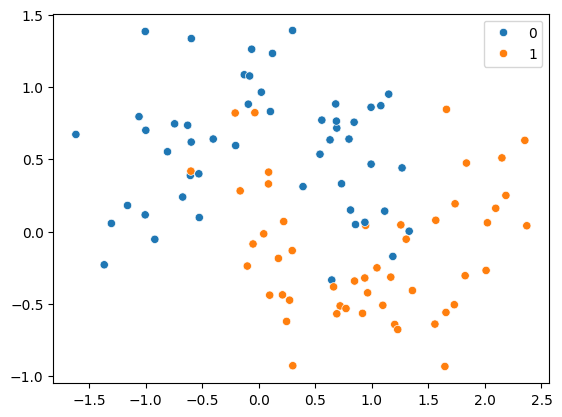

In [34]:
import seaborn as sns
sns.scatterplot(x=x[:,0],y=x[:,1],hue=y)

In [35]:
model=Sequential()

In [36]:
model.add(Dense(2,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

In [37]:
initial_weights=model.get_weights()
initial_weights

[array([[-0.52166086, -0.77824885],
        [ 0.3344196 ,  0.30605602]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-1.3509737],
        [-1.2737476]], dtype=float32),
 array([0.], dtype=float32)]

In [38]:
# initializing_weights
initial_weights[0]=np.ones(model.get_weights()[0].shape)
initial_weights[1]=np.zeros(model.get_weights()[1].shape)# bias term zero initialize
initial_weights[2]=np.ones(model.get_weights()[2].shape)
initial_weights[3]=np.zeros(model.get_weights()[3].shape)# bias term zero initialize



In [39]:
model.set_weights(initial_weights)

In [40]:
model.get_weights()

[array([[1., 1.],
        [1., 1.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[1.],
        [1.]], dtype=float32),
 array([0.], dtype=float32)]

In [41]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')
history=model.fit(x,y,epochs=200,validation_split=0.2,verbose=1)

Epoch 1/200


3/3 [==============================] - 1s 120ms/step - loss: 1.1062 - accuracy: 0.5375 - val_loss: 1.0501 - val_accuracy: 0.5500
Epoch 2/200
3/3 [==============================] - 0s 23ms/step - loss: 1.1006 - accuracy: 0.5500 - val_loss: 1.0448 - val_accuracy: 0.5500
Epoch 3/200
3/3 [==============================] - 0s 23ms/step - loss: 1.0943 - accuracy: 0.5500 - val_loss: 1.0398 - val_accuracy: 0.5500
Epoch 4/200
3/3 [==============================] - 0s 21ms/step - loss: 1.0883 - accuracy: 0.5500 - val_loss: 1.0349 - val_accuracy: 0.5500
Epoch 5/200
3/3 [==============================] - 0s 27ms/step - loss: 1.0837 - accuracy: 0.5500 - val_loss: 1.0298 - val_accuracy: 0.5500
Epoch 6/200
3/3 [==============================] - 0s 25ms/step - loss: 1.0779 - accuracy: 0.5625 - val_loss: 1.0248 - val_accuracy: 0.5500
Epoch 7/200
3/3 [==============================] - 0s 27ms/step - loss: 1.0720 - accuracy: 0.5625 - val_loss: 1.0200 - val_accuracy: 0.5500
Epoch 8/200
3/3 [==============

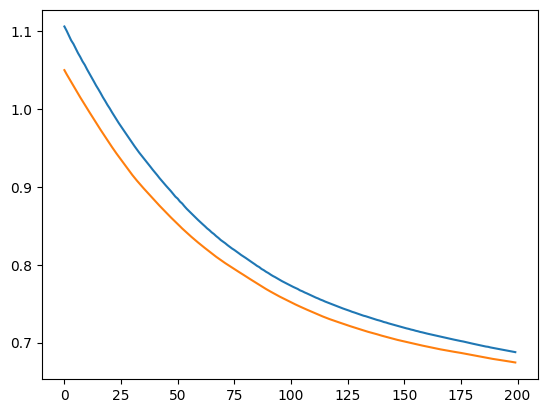

In [42]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

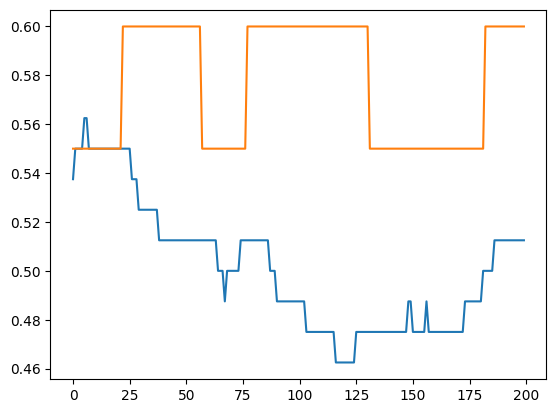

In [43]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

9600/9600 [==============================] - 15s 2ms/step


<Axes: >

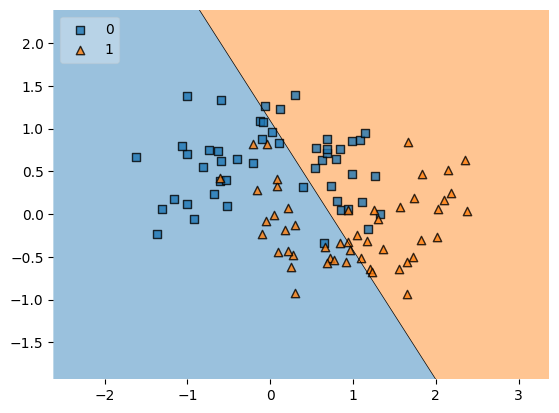

In [44]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x,y,clf=model,legend=2)

# observation:-its too bad 